In [2]:
!pip install -q yfinance

     |████████████████████████████████| 62 kB 1.3 MB/s 


Upload bibliotecas

In [3]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yfinance as yf

Upload base de dados

In [15]:
acoes = ['ABEV3.SA', 'ITSA4.SA', 'SAPR4.SA', 'PETR4.SA', 'BOVA11.SA']

acoes_df = pd.DataFrame()
for acao in acoes:
  #acoes_df[acao] = data.DataReader(acao, data_source='yahoo', start='2015-01-01')['Close']
  acoes_df[acao] = yf.download(acao, start='2015-01-01')['Close']

acoes_df.info()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1950 entries, 2015-01-02 to 2022-11-04
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ABEV3.SA   1950 non-null   float64
 1   ITSA4.SA   1950 non-null   float64
 2   SAPR4.SA   1950 non-null   float64
 3   PETR4.SA   1950 non-null   float64
 4   BOVA11.SA  1950 non-null   float64
dtypes: float64(5)
memory usage: 91.4 KB


Normalização para base 100

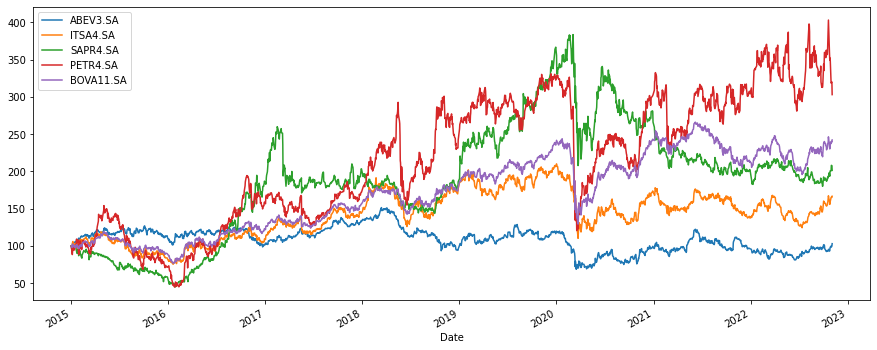

In [16]:


(acoes_df/acoes_df.iloc[0]*100).plot(figsize=(15,6))

In [12]:
acoes_df.iloc[0] 

ABEV3.SA    16.020000
ITSA4.SA     6.503327
SAPR4.SA     1.916666
PETR4.SA     9.360000
MGLU3.SA     0.232812
Name: 2015-01-02 00:00:00, dtype: float64

Calculo do retorno do portfolio de ações

In [18]:
retorno=(acoes_df/acoes_df.shift(1))-1

retorno.head()


,ABEV3.SA,ITSA4.SA,SAPR4.SA,PETR4.SA,BOVA11.SA
Date,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.018102,0.003272,-0.069565,-0.085470,-0.019890
2015-01-06,0.038144,0.007609,0.000000,-0.032710,0.005613
2015-01-07,0.014084,0.037756,0.028037,0.047101,0.033705
2015-01-08,-0.001208,0.010395,0.036364,0.064590,0.007477


Pesos das ações no portfolio

In [22]:
pesos=np.array([0.2,0.2,0.2,0.2,0.2])

Retorno anualizado

In [23]:
retorno_anual=retorno.mean()*250

In [24]:
np.dot(retorno_anual,pesos)

0.1472830772367146

Logo, o retorno médio anual do portfolio de ações é igual a 14,7%

Definindo o portfolio com pesos alternativos

In [28]:
pesos_2= np.array([0.3,0.2,0.25,0.15,0.1])

In [29]:
np.dot(retorno_anual, pesos_2)

0.13091668260323827

O portfolio desbalanceado apresentou um desempenho inferior ao primeiro cenario com a carteira balanceada.